In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv("/bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


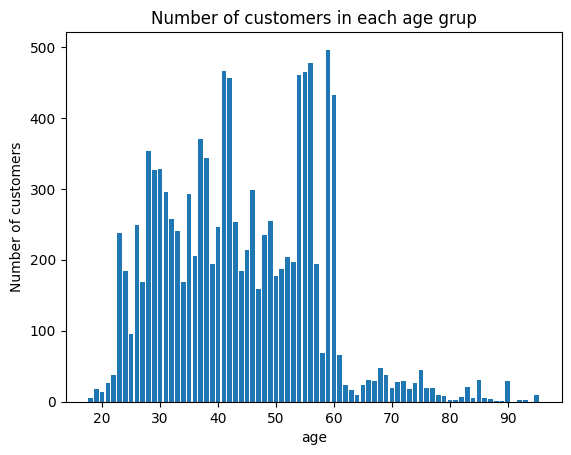

In [8]:
# bar chart of the number of customers in each age group.

plt.bar(df["age"].unique(), df["age"].value_counts())
plt.xlabel("age")
plt.ylabel("Number of customers")
plt.title("Number of customers in each age grup")
plt.show()

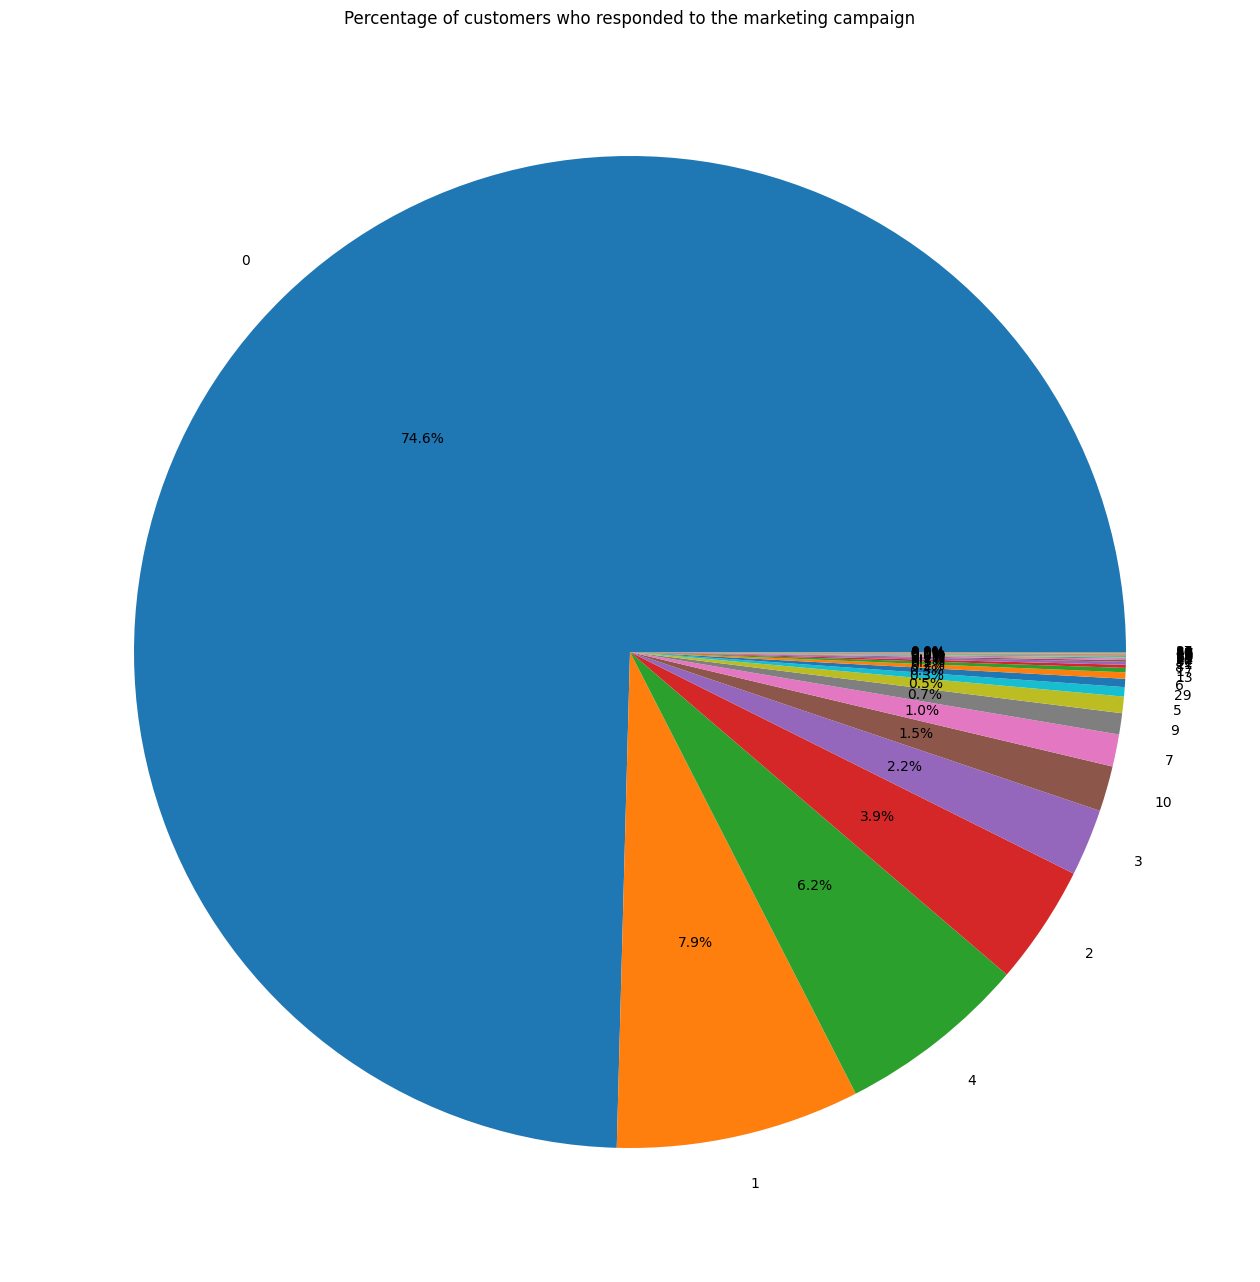

In [53]:
# pie chart of the number of customers who responded to the marketing campaign

plt.figure(figsize=(16,25))
plt.pie(df["previous"].value_counts(), labels= df["previous"].unique(), autopct="%1.1f%%")
plt.title("Percentage of customers who responded to the marketing campaign")
plt.show()

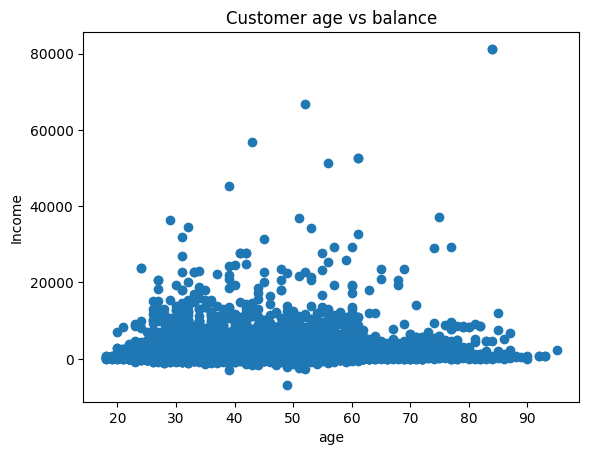

In [17]:
# scatter plot of the customer's age and balance

plt.scatter(df["age"], df["balance"])
plt.xlabel("age")
plt.ylabel("Income")
plt.title("Customer age vs balance")
plt.show()

In [20]:
# correlation between pair of features

corr = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].corr()

In [21]:
# identify the features with the strongest correlation with customer subscription

most_corr_feat = corr['previous'].nlargest(5)

In [23]:
print("The features that are most strongly correlated with customer subscription are:")
print(most_corr_feat)

The features that are most strongly correlated with customer subscription are:
previous    1.000000
pdays       0.507272
balance     0.030805
age         0.020169
duration   -0.026716
Name: previous, dtype: float64


In [24]:
# features that use for clustering
features = ["balance", "age", "campaign"]

In [47]:
# create K-means model
kmeans = KMeans(n_clusters=5, random_state = 42)
kmeans.fit(df[features])
labels = kmeans.predict(df[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


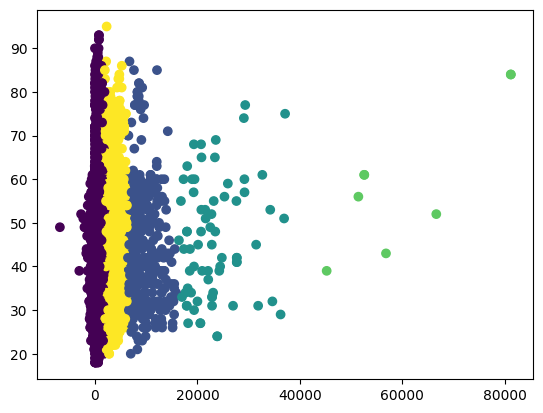

In [51]:
plt.scatter(df["balance"], df["age"], c=labels)
plt.show()

In [40]:
print(kmeans.cluster_centers_)

[[4.65361005e+02 4.03761723e+01 2.55285400e+00]
 [9.21980045e+03 4.37802691e+01 2.51569507e+00]
 [2.33255634e+04 4.60000000e+01 2.98591549e+00]
 [6.09691250e+04 6.00000000e+01 1.50000000e+00]
 [3.39316250e+03 4.41150000e+01 2.30200000e+00]]


Based on the clustering result from kmeans. It was found that there is a 5 groups customer  Where the least and higher balance come from group with the colour green. Based on that it most likely for retirement or invesment service with how the range of age come from 40 to 85.

